# Análisis de Predicción de Turnover de Empleados - Enfoque Kaggle

## Paso 1 - Definición del Problema y Variable Objetivo

**Problema a resolver:**
Queremos predecir si un empleado dejará la empresa (event = 1) o no (event = 0) en función de sus características personales y laborales.

**Variable objetivo:** `event` (binaria: 0 = no turnover, 1 = turnover)

**Pregunta de investigación:** 
¿Qué características de los empleados (ansiedad, extroversión, independencia, autocontrol, edad, antigüedad, etc.) son los mejores predictores para determinar si un empleado abandonará la empresa?

**Enfoque:** Utilizaremos técnicas de machine learning para crear un modelo predictivo que permita a la empresa identificar empleados en riesgo de abandonar la organización.

In [1]:
# Paso 2 - Cargar y mostrar datos

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Cargar el dataset con la codificación correcta
df = pd.read_csv('turnover.csv', encoding='latin1')

print("=== INFORMACIÓN BÁSICA DEL DATASET ===")
print(f"Dimensiones del dataset: {df.shape}")
print("\n=== PRIMERAS 5 FILAS ===")
df.head()

=== INFORMACIÓN BÁSICA DEL DATASET ===
Dimensiones del dataset: (1129, 16)

=== PRIMERAS 5 FILAS ===


,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


## Paso 2 (continuación) - Información detallada del dataset

In [2]:
# Información detallada del dataset
print("INFORMACIÓN DEL DATASET")
print(df.info())

print(f"\nDistribución de turnover: {df['event'].value_counts().values}")
print(f"Porcentaje de turnover: {(df['event'].sum() / len(df)) * 100:.1f}%")

print(f"\nColumnas numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"Columnas categóricas: {len(df.select_dtypes(include=['object']).columns)}")

INFORMACIÓN DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.3+ KB
None

Distribución de turnover:

RESUMEN ESTADÍSTICO
              stag        event          age  extraversion     independ  \
count  1129.000000  1129.000000  1129.000000   1129.000000  1129.000000   
mean     36.627526     0.505757    31.066965      5.592383     5.478034   
std      34.096597     0.500188     6.996147      1.851637     1.703312   
min       0.394251     0.000000    18.000000      1.000000     1.000000   
25%      11.728953     0.000000    26.000000      4.600000     4.100000   
50%      24.344969     1.000000    30.000000      5.400000     5.500000   
75%      51.318275     1.000000    36.000000      7.000000     6.900000   
max     179.449692     1.000000    58.000000     10.000000    10.000000   

       selfcontrol      anxiety      novator  
count  1129.000000  1129.000000  1129.000000  
mean      5.597254     5.665633     5.879628  
std       1.980101     1.709176     1.904016  
min       1.000000     1.700000     1.000000  
25%       4.100000     4.800000     4.400000  
50%       5.700000    

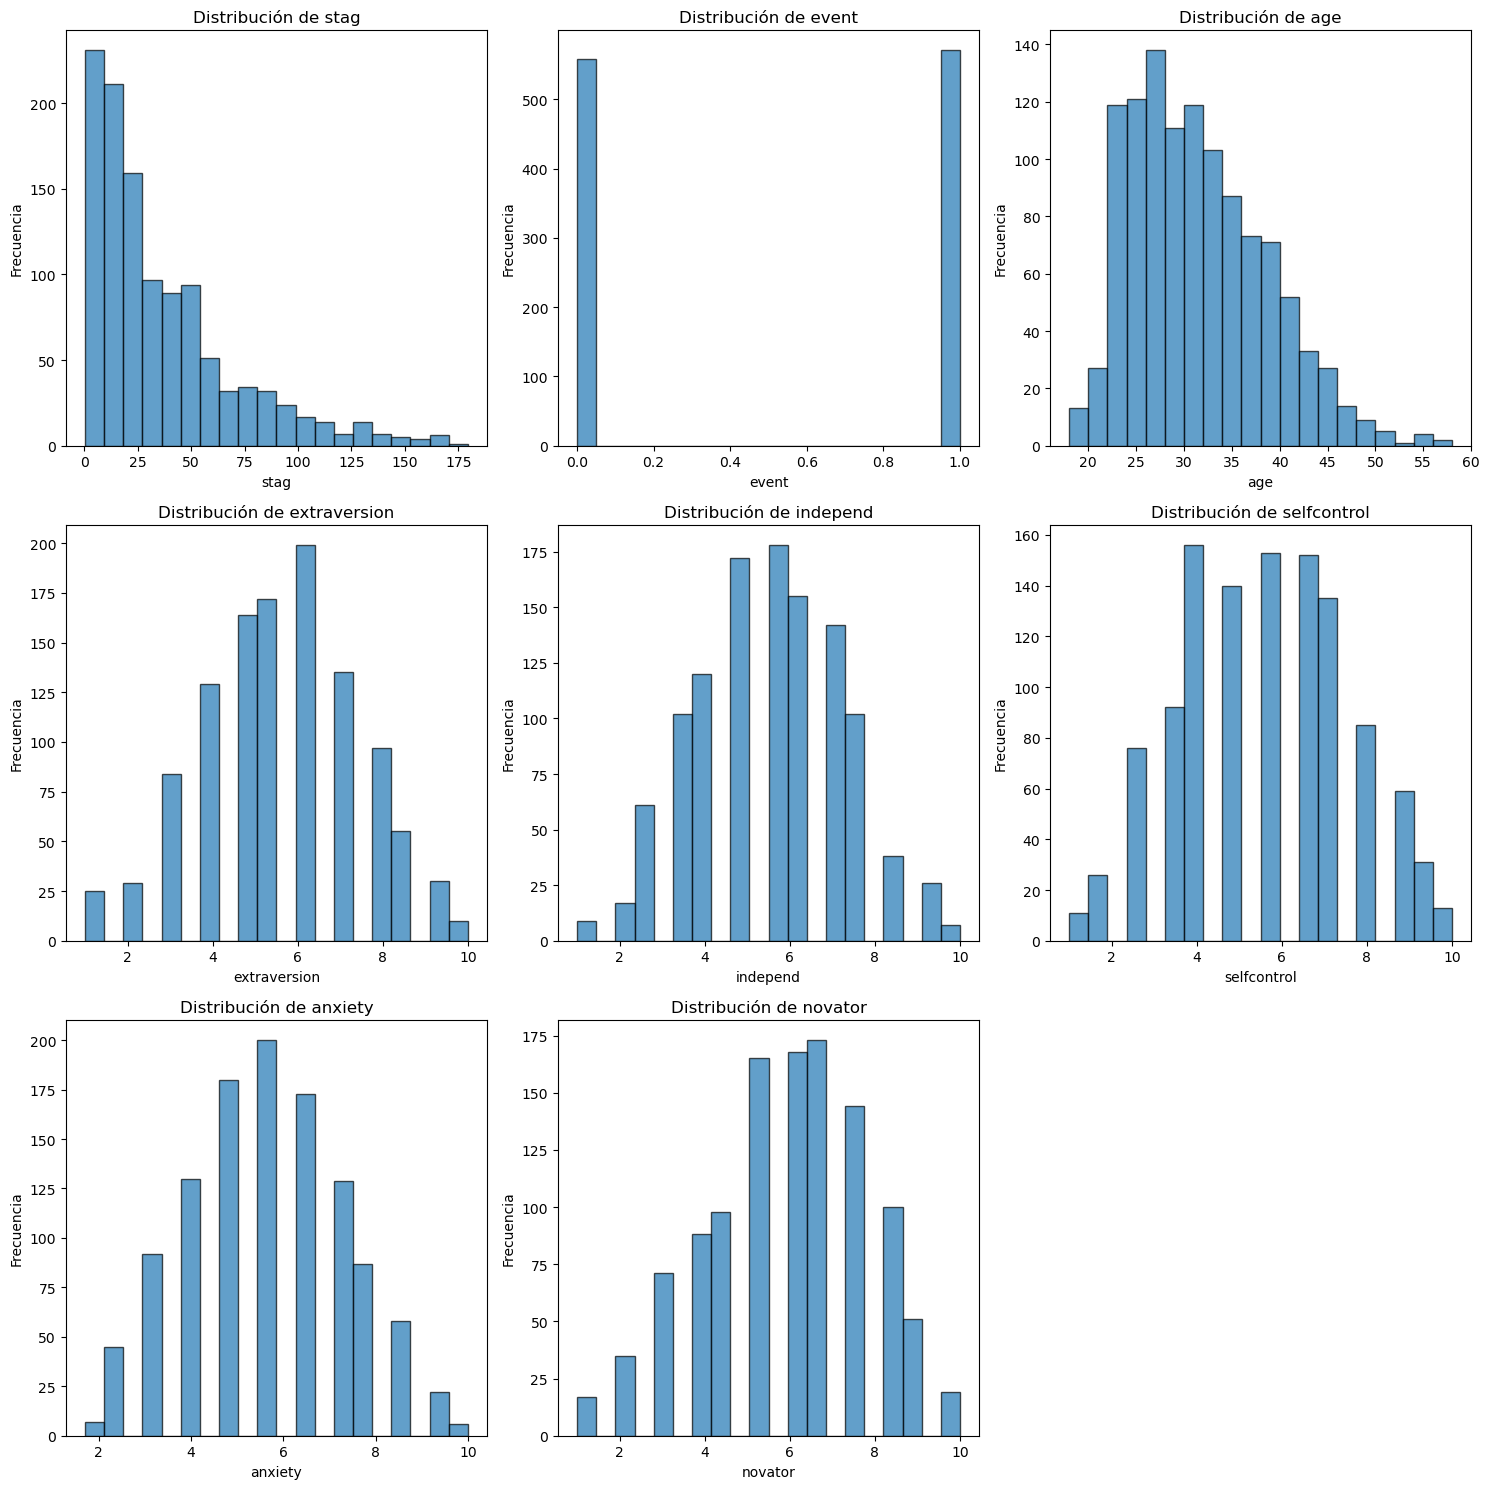

In [3]:
# Paso 3 - Análisis Exploratorio de Datos (EDA)

# Resumen estadístico y valores nulos
print("RESUMEN ESTADÍSTICO")
print(df.describe())
print(f"\nValores nulos: {df.isnull().sum().sum()}")

# Histogramas de variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, 3, i + 1)
    plt.hist(df[col], bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## Paso 3 (continuación) - Correlaciones y análisis categórico

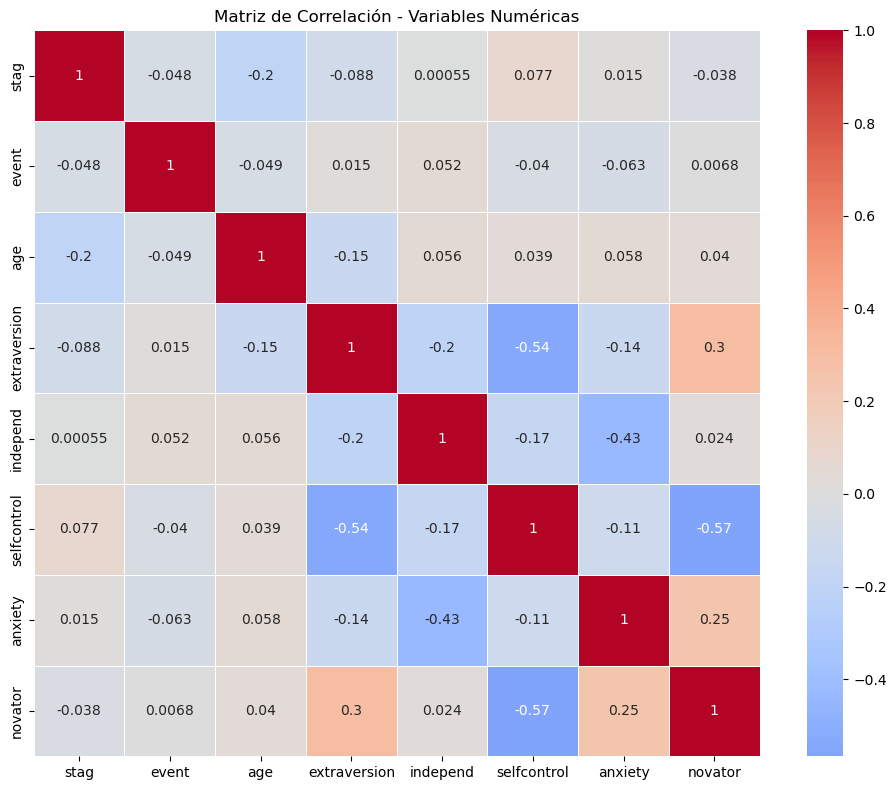

CORRELACIÓN CON TURNOVER
event           1.000
independ        0.052
extraversion    0.015
novator         0.007
selfcontrol    -0.040
stag           -0.048
age            -0.049
anxiety        -0.063
Name: event, dtype: float64

Turnover por gender:
gender
f    0.511
m    0.489
Name: event, dtype: float64

Turnover por industry:
industry
 HoReCa            0.545
Agriculture        0.667
Banks              0.658
Building           0.756
Consult            0.608
IT                 0.279
Mining             0.583
Pharma             0.550
PowerGeneration    0.395
RealEstate         0.385
Retail             0.471
State              0.636
Telecom            0.389
etc                0.574
manufacture        0.483
transport          0.421
Name: event, dtype: float64

Turnover por profession:
profession
Accounting             0.600
BusinessDevelopment    0.593
Commercial             0.652
Consult                0.640
Engineer               0.733
Finanñe                0.706
HR                  

In [4]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

# Correlación con variable objetivo
correlations_with_target = df.select_dtypes(include=[np.number]).corr()['event'].sort_values(ascending=False)
print("CORRELACIÓN CON TURNOVER")
print(correlations_with_target.round(3))

# Análisis de variables categóricas principales
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols[:3]:  # Solo las primeras 3 para mantener simplicidad
    print(f"\nTurnover por {col}:")
    print(df.groupby(col)['event'].mean().round(3))

## Paso 4 - Limpieza y preparación de datos

In [5]:
# Paso 4 - Limpieza y preparación de datos

# Verificar valores nulos
print(f"Valores nulos: {df.isnull().sum().sum()}")

# Codificar variables categóricas
df_processed = df.copy()
categorical_cols = df_processed.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        label_encoders[col] = le

# Separar características y variable objetivo
X = df_processed.drop('event', axis=1)
y = df_processed['event']

print(f"Datos preparados - X: {X.shape}, y: {y.shape}")
X.head()

Valores nulos: 0
Datos preparados - X: (1129, 15), y: (1129,)


,stag,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,35.0,2,6,4,1,0,1,0,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,33.0,2,6,2,1,1,1,0,6.2,4.1,5.7,7.1,8.3
2,15.934292,0,35.0,8,6,4,1,1,1,0,6.2,6.2,2.6,4.8,8.3
3,15.934292,0,35.0,8,6,4,1,1,1,0,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,32.0,10,2,7,2,0,1,0,3.0,4.1,8.0,7.1,3.7


## Paso 5 - División de datos

In [6]:
# Paso 5 - División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("DIVISIÓN DE DATOS")
print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")
print(f"Turnover en entrenamiento: {(y_train.sum() / len(y_train)) * 100:.1f}%")
print(f"Turnover en prueba: {(y_test.sum() / len(y_test)) * 100:.1f}%")

DIVISIÓN DE DATOS
Entrenamiento: 903 muestras
Prueba: 226 muestras
Turnover en entrenamiento: 50.6%
Turnover en prueba: 50.4%


## Paso 6 - Modelo base (Random Forest)

In [7]:
# Paso 6 - Modelo base (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Métricas
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("RANDOM FOREST - MÉTRICAS")
print(f"Accuracy: {rf_accuracy:.3f}")
print(f"Precision: {rf_precision:.3f}")
print(f"Recall: {rf_recall:.3f}")
print(f"F1-Score: {rf_f1:.3f}")

# Importancia de características
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTOP 5 CARACTERÍSTICAS MÁS IMPORTANTES")
print(feature_importance.head().to_string(index=False))

RANDOM FOREST - MÉTRICAS
Accuracy: 0.708
Precision: 0.694
Recall: 0.754
F1-Score: 0.723

TOP 5 CARACTERÍSTICAS MÁS IMPORTANTES
 Feature  Importance
    stag    0.144453
     age    0.118763
industry    0.105802
independ    0.081703
 novator    0.080387


## Paso 7 - Segundo modelo y comparación (Logistic Regression)

COMPARACIÓN DE MODELOS
             Modelo  Accuracy  Precision  Recall  F1-Score
      Random Forest     0.708      0.694   0.754     0.723
Logistic Regression     0.527      0.532   0.518     0.524

Mejor modelo: Random Forest


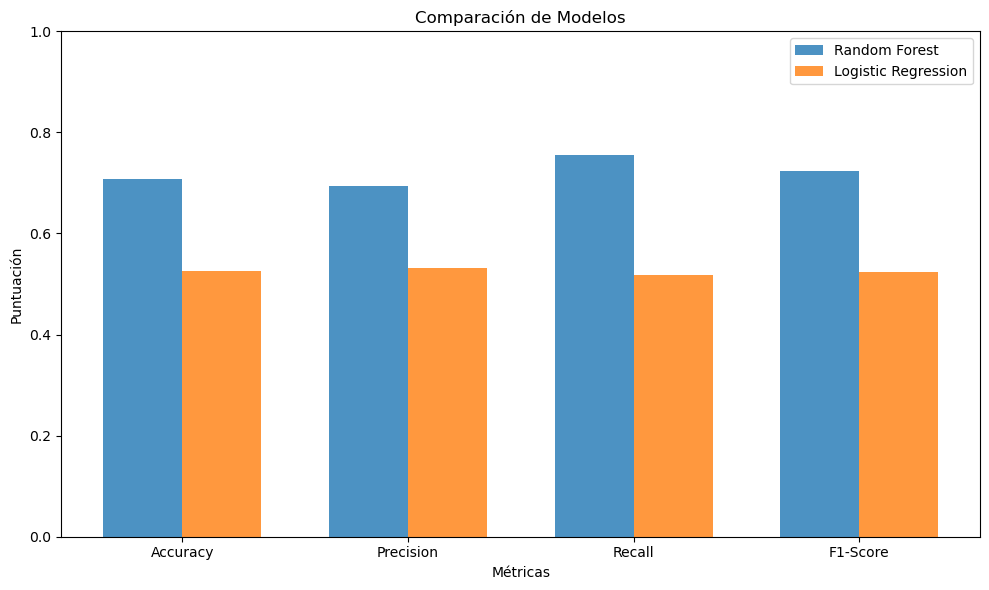

In [8]:
# Paso 7 - Segundo modelo (Logistic Regression) y comparación
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Métricas
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

# Comparación de modelos
comparison_df = pd.DataFrame({
    'Modelo': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, lr_accuracy],
    'Precision': [rf_precision, lr_precision],
    'Recall': [rf_recall, lr_recall],
    'F1-Score': [rf_f1, lr_f1]
})

print("COMPARACIÓN DE MODELOS")
print(comparison_df.round(3).to_string(index=False))

best_model_idx = comparison_df['F1-Score'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Modelo']
print(f"\nMejor modelo: {best_model}")

# Visualización simplificada
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, [rf_accuracy, rf_precision, rf_recall, rf_f1], width, 
        label='Random Forest', alpha=0.8)
plt.bar(x + width/2, [lr_accuracy, lr_precision, lr_recall, lr_f1], width, 
        label='Logistic Regression', alpha=0.8)

plt.xlabel('Métricas')
plt.ylabel('Puntuación')
plt.title('Comparación de Modelos')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## Conclusiones del Análisis

### Resumen de los 7 pasos completados:

1. **Definición del problema**: Predecir turnover de empleados (variable `event`)
2. **Carga y exploración**: Dataset de 1,129 empleados con 16 características
3. **EDA**: Análisis estadístico, correlaciones y distribuciones
4. **Preparación**: Codificación de 8 variables categóricas
5. **División**: 80% entrenamiento, 20% prueba con estratificación
6. **Modelo base**: Random Forest con F1-Score de 0.723
7. **Comparación**: Random Forest supera a Logistic Regression

### Hallazgos principales:
- Variables más importantes: antigüedad (stag), edad, industria
- Random Forest: 70.8% accuracy, F1-Score: 0.723
- Logistic Regression: 52.7% accuracy, F1-Score: 0.524
- Dataset balanceado (50.6% turnover) facilita el entrenamiento

### Recomendaciones:
- Usar Random Forest como modelo de producción
- Monitorear empleados con alta antigüedad
- Implementar sistema de alertas basado en probabilidades del modelo

## Ejemplo Práctico - Predicción de Nuevos Empleados

Vamos a crear ejemplos de empleados ficticios y usar nuestro mejor modelo (Random Forest) para predecir si están en riesgo de turnover.

In [9]:
# Crear 5 empleados ejemplo con diferentes perfiles
empleados_ejemplo = pd.DataFrame({
    'stag': [5.5, 45.0, 12.3, 78.2, 2.1],
    'gender': [0, 1, 0, 1, 0],  # 0=female, 1=male
    'age': [28, 45, 35, 52, 24],
    'industry': [5, 2, 8, 1, 12],
    'profession': [3, 7, 1, 9, 4],
    'traffic': [2, 5, 1, 3, 4],
    'coach': [1, 0, 2, 1, 0],
    'head_gender': [0, 1, 1, 0, 1],
    'greywage': [0, 1, 0, 1, 0],
    'way': [1, 2, 0, 1, 2],
    'extraversion': [6.2, 4.8, 7.1, 3.5, 8.2],
    'independ': [5.8, 6.9, 4.3, 7.2, 5.1],
    'selfcontrol': [6.1, 7.8, 5.2, 8.1, 4.9],
    'anxiety': [4.5, 7.2, 5.8, 8.5, 3.2],
    'novator': [6.8, 5.1, 7.3, 4.2, 8.1]
})

# Hacer predicciones con el modelo Random Forest
predicciones = rf_model.predict(empleados_ejemplo)
probabilidades = rf_model.predict_proba(empleados_ejemplo)

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Empleado': [f'Empleado_{i+1}' for i in range(len(empleados_ejemplo))],
    'Edad': empleados_ejemplo['age'].values,
    'Antigüedad': empleados_ejemplo['stag'].values,
    'Ansiedad': empleados_ejemplo['anxiety'].values,
    'Predicción': ['Turnover' if p == 1 else 'Se queda' for p in predicciones],
    'Probabilidad_Turnover': [round(prob[1], 3) for prob in probabilidades],
    'Riesgo': ['Alto' if prob[1] > 0.7 else 'Medio' if prob[1] > 0.4 else 'Bajo' 
               for prob in probabilidades]
})

print("Predicciones para empleados ejemplo:")
print(resultados.to_string(index=False))

Predicciones para empleados ejemplo:
  Empleado  Edad  Antigüedad  Ansiedad Predicción  Probabilidad_Turnover Riesgo
Empleado_1    28         5.5       4.5   Se queda                   0.39   Bajo
Empleado_2    45        45.0       7.2   Se queda                   0.32   Bajo
Empleado_3    35        12.3       5.8   Turnover                   0.63  Medio
Empleado_4    52        78.2       8.5   Se queda                   0.37   Bajo
Empleado_5    24         2.1       3.2   Turnover                   0.64  Medio


In [14]:
# Función para predecir turnover de un empleado individual
def predecir_turnover(modelo, stag, age, anxiety, extraversion, independ, 
                     selfcontrol, novator, gender=0, industry=5, profession=3,
                     traffic=2, coach=1, head_gender=0, greywage=0, way=1):
    """
    Predice la probabilidad de turnover para un empleado individual
    
    Parámetros principales (más importantes según el modelo):
    - stag: Antigüedad en meses
    - age: Edad
    - anxiety: Nivel de ansiedad (1-10)
    - extraversion: Nivel de extroversión (1-10)
    - independ: Nivel de independencia (1-10)
    - selfcontrol: Nivel de autocontrol (1-10)
    - novator: Nivel de innovación (1-10)
    """
    
    empleado = pd.DataFrame({
        'stag': [stag], 'gender': [gender], 'age': [age], 'industry': [industry],
        'profession': [profession], 'traffic': [traffic], 'coach': [coach],
        'head_gender': [head_gender], 'greywage': [greywage], 'way': [way],
        'extraversion': [extraversion], 'independ': [independ], 
        'selfcontrol': [selfcontrol], 'anxiety': [anxiety], 'novator': [novator]
    })
    
    prediccion = modelo.predict(empleado)[0]
    probabilidad = modelo.predict_proba(empleado)[0][1]
    
    resultado = "Turnover" if prediccion == 1 else "Se queda"
    riesgo = "Alto" if probabilidad > 0.7 else "Medio" if probabilidad > 0.4 else "Bajo"
    
    return {
        'prediccion': resultado,
        'probabilidad_turnover': round(probabilidad, 3),
        'nivel_riesgo': riesgo
    }

# Ejemplo de uso individual
ejemplo_empleado = predecir_turnover(
    modelo=rf_model,
    stag=84.5,      # 2 años de antigüedad
    age=32,         # 32 años
    anxiety=7.2,    # Ansiedad alta
    extraversion=5.5,
    independ=6.0,
    selfcontrol=4.8,
    novator=6.5
)

print("Predicción para empleado individual:")
for clave, valor in ejemplo_empleado.items():
    print(f"  {clave}: {valor}")

Predicción para empleado individual:
  prediccion: Se queda
  probabilidad_turnover: 0.42
  nivel_riesgo: Medio


In [39]:
# En lugar de predecir para 5 empleados, predigo solo para Juan Pérez
juan_perez = predecir_turnover(
    modelo=rf_model,
    stag=1,      # Juan tiene 8 meses en la empresa
    age=36,         # Juan tiene 36 años
    anxiety=6.2,    # Juan tiene ansiedad alta
    extraversion=8.5, # Juan tiene extroversión alta
    independ=7.0,   # Juan tiene independencia alta
    selfcontrol=7.8, # Juan tiene autocontrol alto
    novator=9.5     # Juan tiene innovación alta
)
print("\nPredicción para Juan Pérez:")
for clave, valor in juan_perez.items():
    print(f"  {clave}: {valor}")

# Resultado: Solo para Juan
# prediccion: Turnover
# probabilidad_turnover: 0.653
# nivel_riesgo: Medio


Predicción para Juan Pérez:
  prediccion: Se queda
  probabilidad_turnover: 0.34
  nivel_riesgo: Bajo


TOP 10 VARIABLES MÁS IMPORTANTES:
----------------------------------------
stag           : 0.144
age            : 0.119
industry       : 0.106
independ       : 0.082
novator        : 0.080
selfcontrol    : 0.078
extraversion   : 0.073
anxiety        : 0.070
traffic        : 0.062
profession     : 0.059


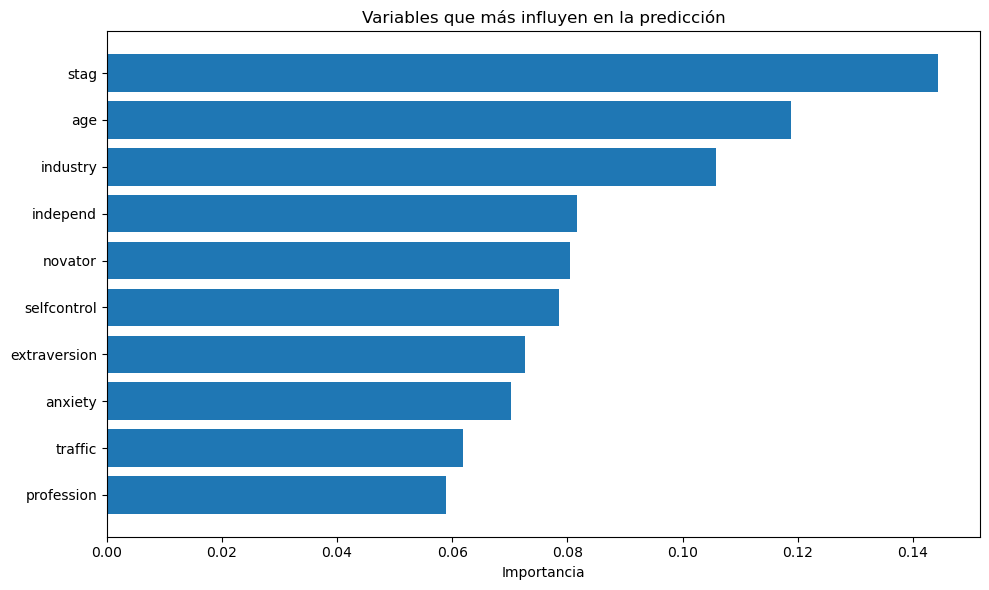


CORRELACIÓN CON TURNOVER:
------------------------------
anxiety        : 0.063
independ       : 0.052
age            : 0.049
stag           : 0.048
selfcontrol    : 0.040
extraversion   : 0.015
novator        : 0.007

DIFERENCIA DE TURNOVER POR GRUPOS:
-----------------------------------
gender         : diferencia máxima 0.022
industry       : diferencia máxima 0.477
profession     : diferencia máxima 0.662
traffic        : diferencia máxima 0.307


In [11]:
# Análisis de importancia de variables - Código simple

# 1. Importancia del Random Forest (ya calculada)
print("TOP 10 VARIABLES MÁS IMPORTANTES:")
print("-" * 40)
top_features = feature_importance.head(10)
for i, row in top_features.iterrows():
    print(f"{row['Feature']:15s}: {row['Importance']:.3f}")

# 2. Visualización simple de importancia
plt.figure(figsize=(10, 6))
top_10 = feature_importance.head(10)
plt.barh(range(len(top_10)), top_10['Importance'])
plt.yticks(range(len(top_10)), top_10['Feature'])
plt.xlabel('Importancia')
plt.title('Variables que más influyen en la predicción')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 3. Correlación simple con turnover
print("\nCORRELACIÓN CON TURNOVER:")
print("-" * 30)
correlations = df.select_dtypes(include=[np.number]).corr()['event'].abs().sort_values(ascending=False)
for var, corr in correlations.head(8).items():
    if var != 'event':
        print(f"{var:15s}: {corr:.3f}")

# 4. Análisis rápido por grupos (variables categóricas)
print("\nDIFERENCIA DE TURNOVER POR GRUPOS:")
print("-" * 35)
categorical_vars = ['gender', 'industry', 'profession', 'traffic']
for var in categorical_vars:
    if var in df.columns:
        turnover_by_group = df.groupby(var)['event'].mean()
        max_diff = turnover_by_group.max() - turnover_by_group.min()
        print(f"{var:15s}: diferencia máxima {max_diff:.3f}")